In [17]:
import baostock as bs
import pandas as pd
import mplfinance as mpf

# 登录baostock系统
lg = bs.login()

# 设置股票代码和时间范围
stock_code = "sh.000001"  # 上证指数
start_date = "2023-01-01"
end_date = "2024-12-31"

# 获取股票数据
rs = bs.query_history_k_data(stock_code,
                              "date,open,high,low,close,volume",
                              start_date=start_date,
                              end_date=end_date,
                              frequency="d",
                              adjustflag="3")  # adjustflag="3"表示不复权
data = rs.get_data()

# 登出baostock系统
bs.logout()

# 创建DataFrame
df = data[['date', 'open', 'high', 'low', 'close', 'volume']].rename(columns={'date': 'Date'})

# 转换日期格式
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # 设置日期列为索引



login success!
logout success!


In [18]:
# 将股价数据转换为数值类型
df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)

df 

# 设置蜡烛图数据
ohlc = df[['open', 'high', 'low', 'close','volume']]


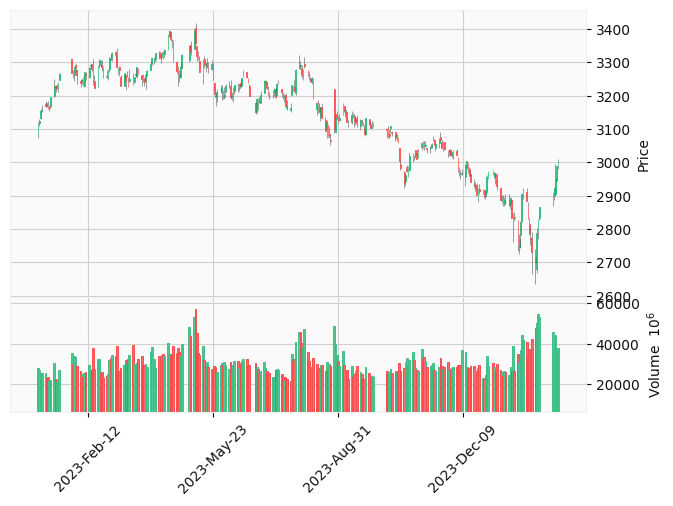

In [19]:
# 绘制蜡烛图
mpf.plot(ohlc, type='candle', style='yahoo', volume=True, show_nontrading=True)